In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Generated dataset

### Generate dataset

In [5]:
#http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

v = 15 #номер варианта 

rnd = random.uniform(1,20)
#rnd = random.randint(1,20) #имеет ли это значение?

from sklearn import datasets
data, target, coef = datasets.make_regression(n_samples = v*10, n_features = v, n_informative = round(v*0.2), n_targets = 1, 
                                              noise = rnd, coef = True, random_state = 2)

### Feature plots

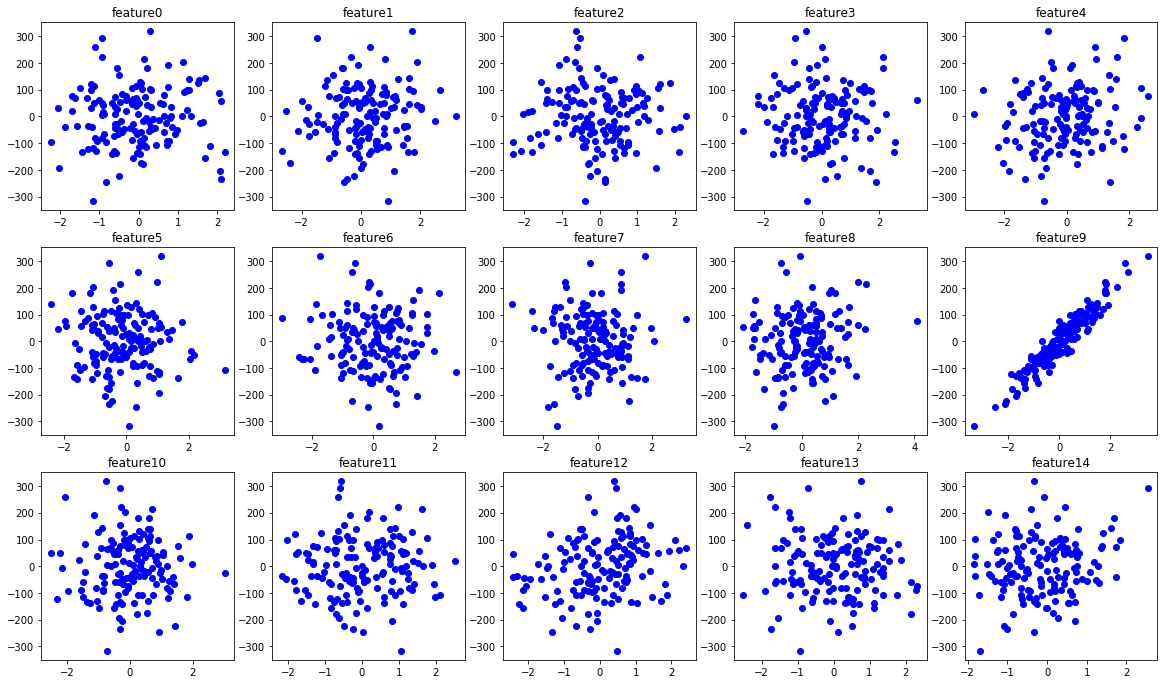

In [8]:
pyplot.figure(figsize(20, 20))

plot_number = 0

for plot_number in range(v):
    pyplot.subplot(5, 5, plot_number + 1)
    pyplot.scatter(list(map(lambda x : x[plot_number], data)), target, color = 'b')
    pyplot.title('feature'+str(plot_number))
    plot_number += 1

### Learn linear regression model and get predictions

In [9]:
from sklearn import linear_model

regression_model = linear_model.LinearRegression()
regression_model.fit(data, target)
predictions = regression_model.predict(data)

### Print learned and true regression models

In [10]:
eq = 'y = ' + str(round(regression_model.intercept_,3))
for i in range(len(regression_model.coef_)):
    eq += ' + {:.3f}*x{}'.format(regression_model.coef_[i], str(i+1))

print ("Learned regression model")
print(eq)


Learned regression model
y = -0.359 + 0.197*x1 + 0.054*x2 + -0.321*x3 + -0.152*x4 + 19.844*x5 + 0.853*x6 + 0.186*x7 + -0.088*x8 + 0.821*x9 + 94.045*x10 + -0.167*x11 + -0.652*x12 + 21.581*x13 + -0.529*x14 + 0.008*x15


In [11]:
eq = ''
for i in range(len(coef)):
    eq += ' + {:.3f}*x{}'.format(coef[i], str(i+1))

print ("True regression model")
print('y = ' + eq[2:])

True regression model
y =  0.000*x1 + 0.000*x2 + 0.000*x3 + 0.000*x4 + 19.314*x5 + 0.000*x6 + 0.000*x7 + 0.000*x8 + 0.000*x9 + 93.492*x10 + 0.000*x11 + 0.000*x12 + 21.493*x13 + 0.000*x14 + 0.000*x15


### Print evaluation metrics

In [12]:
from sklearn import metrics

mae = metrics.mean_absolute_error(target, predictions)
print ('MAE = ', mae)
mse = metrics.mean_squared_error(target, predictions)
print ('MSE = ', mse)

MAE =  4.5109010364385025
MSE =  32.45914114538597


In [17]:
def RMSE(predictions, target):
    return np.sqrt(((predictions - target) ** 2).mean())

print ('RMSE = ', str(RMSE(predictions,target)))

RMSE =  5.697292439868781


### Error plotting

Text(0, 0.5, 'target')

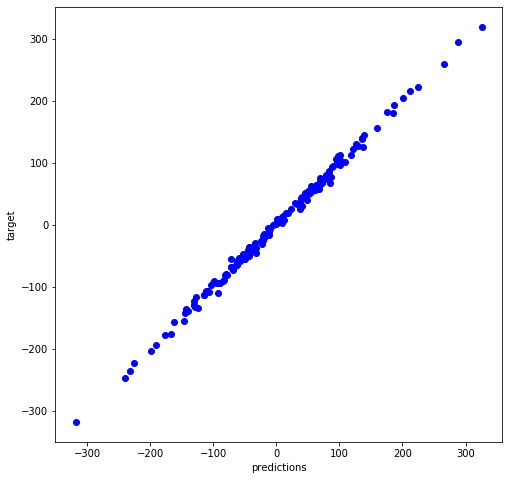

In [13]:
pyplot.figure(figsize(8, 8))
pyplot.scatter(predictions, target, color = 'b')
pyplot.xlabel('predictions')
pyplot.ylabel('target')
